In [1]:
'''
  code by Tae Hwan Jung(Jeff Jung) @graykode
  reference : https://github.com/golbin/TensorFlow-Tutorials/blob/master/04%20-%20Neural%20Network%20Basic/03%20-%20Word2Vec.py
'''
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()


In [2]:
# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

word_sequence = " ".join(sentences).split()
word_sequence

['i',
 'like',
 'dog',
 'i',
 'like',
 'cat',
 'i',
 'like',
 'animal',
 'dog',
 'cat',
 'animal',
 'apple',
 'cat',
 'dog',
 'like',
 'dog',
 'fish',
 'milk',
 'like',
 'dog',
 'cat',
 'eyes',
 'like',
 'i',
 'like',
 'apple',
 'apple',
 'i',
 'hate',
 'apple',
 'i',
 'movie',
 'book',
 'music',
 'like',
 'cat',
 'dog',
 'hate',
 'cat',
 'dog',
 'like']

In [3]:
word_list = " ".join(sentences).split()
word_list

['i',
 'like',
 'dog',
 'i',
 'like',
 'cat',
 'i',
 'like',
 'animal',
 'dog',
 'cat',
 'animal',
 'apple',
 'cat',
 'dog',
 'like',
 'dog',
 'fish',
 'milk',
 'like',
 'dog',
 'cat',
 'eyes',
 'like',
 'i',
 'like',
 'apple',
 'apple',
 'i',
 'hate',
 'apple',
 'i',
 'movie',
 'book',
 'music',
 'like',
 'cat',
 'dog',
 'hate',
 'cat',
 'dog',
 'like']

In [4]:
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
word_dict

{'fish': 0,
 'milk': 1,
 'book': 2,
 'i': 3,
 'like': 4,
 'dog': 5,
 'eyes': 6,
 'hate': 7,
 'movie': 8,
 'cat': 9,
 'animal': 10,
 'apple': 11,
 'music': 12}

In [5]:
# Word2Vec Parameter
batch_size = 20
embedding_size = 2 # To show 2 dim embedding graph
num_sampled = 10 # for negative sampling, less than batch_size
voc_size = len(word_list)
voc_size

13

In [6]:
# 一段话随机选择 一个词 为训练数据 下一个词为测试数据
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(data[i][0])  # target
        random_labels.append([data[i][1]])  # context word

    return random_inputs, random_labels

In [7]:
# Make skip gram of one size window
# 目标是随机选择的词，w 是上下文相连的词
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])

In [8]:
# Model
inputs = tf.placeholder(tf.int32, shape=[batch_size])
labels = tf.placeholder(tf.int32, shape=[batch_size, 1]) # To use tf.nn.nce_loss, [batch_size, 1]

embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)  # 把输入对应成2维的 

nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))  # 共有voc_size个类别，embedding_size为2维的
nce_biases = tf.Variable(tf.zeros([voc_size]))

# Loss and optimizer
cost = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, num_sampled, voc_size)) # num_Sampled 对应负样本的个数
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Epoch: 1000 cost = 3.328975
Epoch: 2000 cost = 3.007651
Epoch: 3000 cost = 2.848083
Epoch: 4000 cost = 3.069819
Epoch: 5000 cost = 3.057447
Epoch: 6000 cost = 2.807050
Epoch: 7000 cost = 2.441884
Epoch: 8000 cost = 2.486839
Epoch: 9000 cost = 2.864729
Epoch: 10000 cost = 2.774954


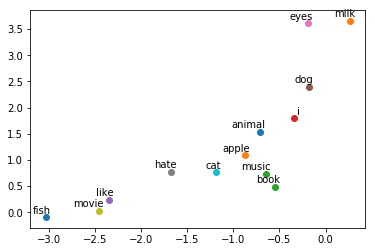

In [9]:
# Training
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(10000):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss = sess.run([optimizer, cost], feed_dict={inputs: batch_inputs, labels: batch_labels})

        if (epoch + 1) % 1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    trained_embeddings = embeddings.eval()

for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

# 还需要进一步理解word2vec